In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [11]:
def load_dataframe():
    dataframe = pd.read_csv(r"D:\end_to_end_mlproject\notebook\data\student_data.csv")
    return dataframe

In [12]:
df = load_dataframe()

In [14]:
def check_dataframe(dataframe, head=5):
    print("################ First 5 rows ###########")
    print(dataframe.head(head))
    print("############# Dataframe Shape #############")
    print(dataframe.shape)
    print("############ Null Values #############")
    print(dataframe.isnull().sum())
    print("################ Statistical Values #############")
    print(dataframe.describe())
    print("################# Last 5 rows##########")
    print(dataframe.tail(head))

In [15]:
check_dataframe(df)

################ First 5 rows ###########
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason guardian  traveltime  studytime  failures schoolsup famsup paid activities nursery higher internet romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  course   mother           2          2         0       yes     no   no         no     yes    yes       no       no       4         3      4     1     1       3         6   5   6   6
1     GP   F   17       U     GT3       T     1     1  at_home     other  course   father           1          2         0        no    yes   no         no      no    yes      yes       no       5         3      3     1     1       3         4   5   5   6
2     GP   F   15       U     LE3       T     1     1  at_home     other   other   mother           1          2         3       yes     no  yes         no     yes    yes      yes       no  

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [17]:
def grab_col_names(dataframe, cat_th = 8, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    num_but_cat =[col for col in dataframe.columns if 
                  dataframe[col].nunique()<cat_th and dataframe[col].dtypes != "O"]
    cat_but_car =[col for col in dataframe.columns if
                  dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations : {dataframe.shape[0]}")
    print(f"Variables : {dataframe.shape[1]}")
    print(f"cat_cols : {len(cat_cols)}")
    print(f"num_cols : {len(num_cols)}")
    print(f"cat_but_car : {len(cat_but_car)}")
    print(f"num_but_cat : {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations : 395
Variables : 33
cat_cols : 28
num_cols : 5
cat_but_car : 0
num_but_cat : 11


In [19]:
cat_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [20]:
num_cols

['age', 'absences', 'G1', 'G2', 'G3']

In [21]:
df["Total_Score"] = (df["G1"] + df["G2"] + df["G3"])
df["Average_Score"] = df["Total_Score"] / 3

In [22]:
new_cols = ["Total_Score", "Average_Score"]
for i in new_cols:
    num_cols.append(i)


In [23]:
num_cols

['age', 'absences', 'G1', 'G2', 'G3', 'Total_Score', 'Average_Score']

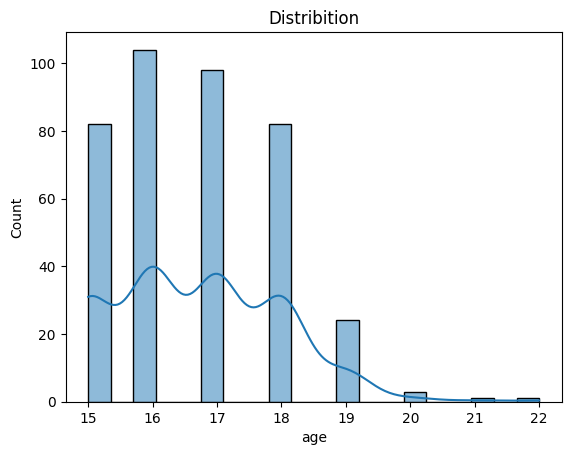

In [24]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribition")
plt.show()

In [25]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                        "Ratio": 100*dataframe[col_name].value_counts()/len(dataframe)}))
    print("##########################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

        school  Ratio
school               
GP         349 88.354
MS          46 11.646
##########################


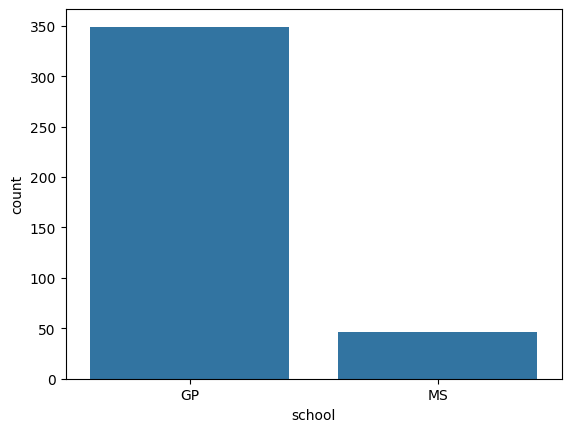

     sex  Ratio
sex            
F    208 52.658
M    187 47.342
##########################


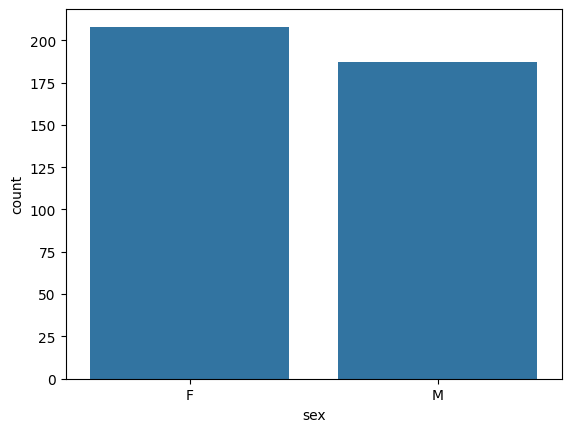

         address  Ratio
address                
U            307 77.722
R             88 22.278
##########################


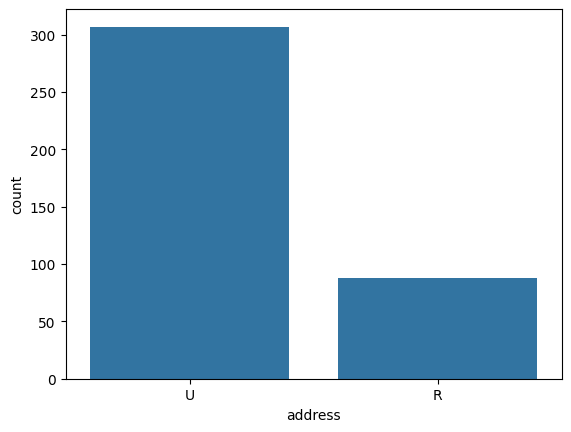

         famsize  Ratio
famsize                
GT3          281 71.139
LE3          114 28.861
##########################


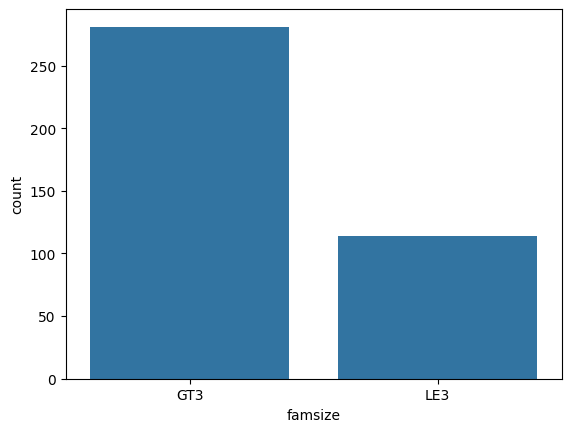

         Pstatus  Ratio
Pstatus                
T            354 89.620
A             41 10.380
##########################


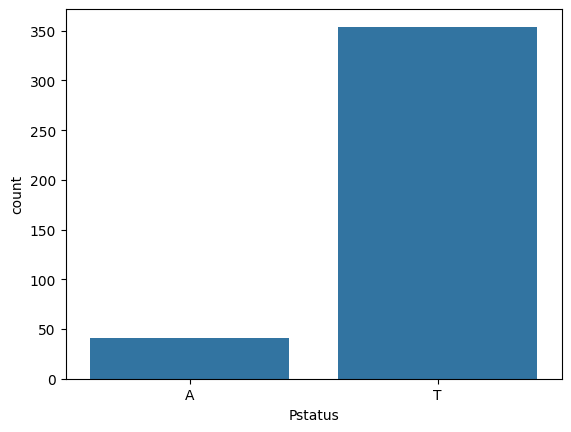

          Mjob  Ratio
Mjob                 
other      141 35.696
services   103 26.076
at_home     59 14.937
teacher     58 14.684
health      34  8.608
##########################


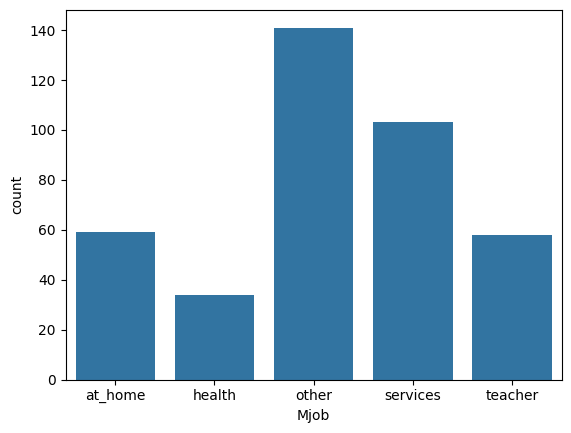

          Fjob  Ratio
Fjob                 
other      217 54.937
services   111 28.101
teacher     29  7.342
at_home     20  5.063
health      18  4.557
##########################


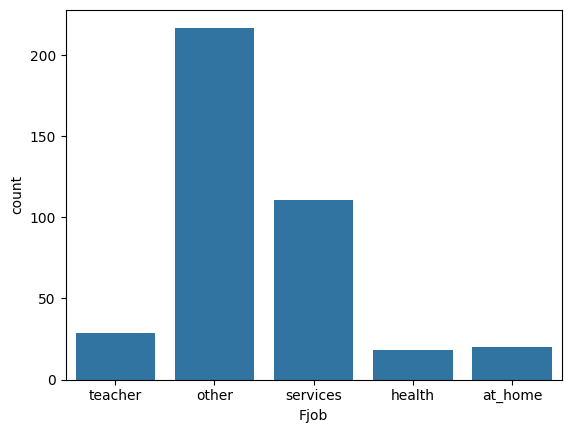

            reason  Ratio
reason                   
course         145 36.709
home           109 27.595
reputation     105 26.582
other           36  9.114
##########################


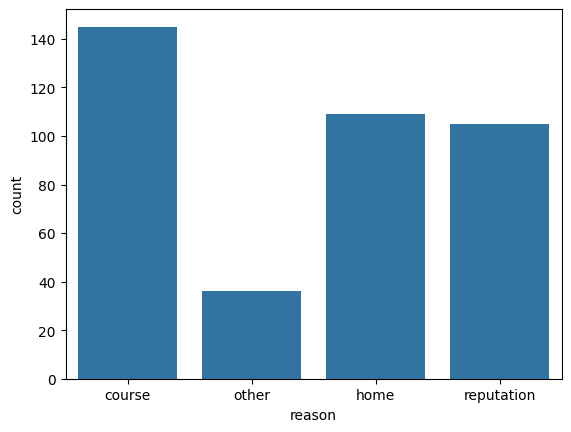

          guardian  Ratio
guardian                 
mother         273 69.114
father          90 22.785
other           32  8.101
##########################


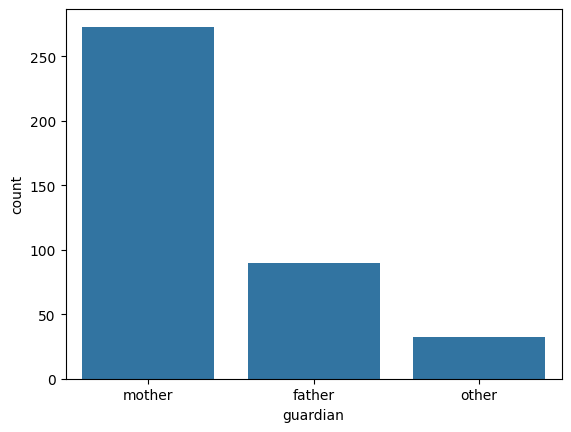

           schoolsup  Ratio
schoolsup                  
no               344 87.089
yes               51 12.911
##########################


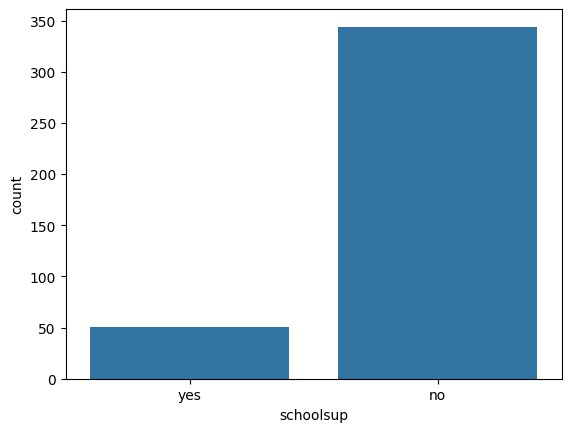

        famsup  Ratio
famsup               
yes        242 61.266
no         153 38.734
##########################


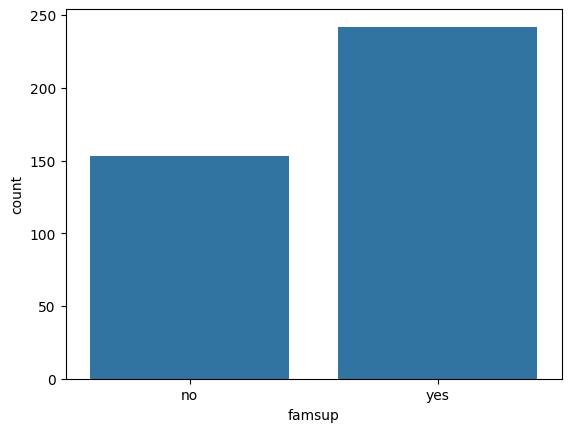

      paid  Ratio
paid             
no     214 54.177
yes    181 45.823
##########################


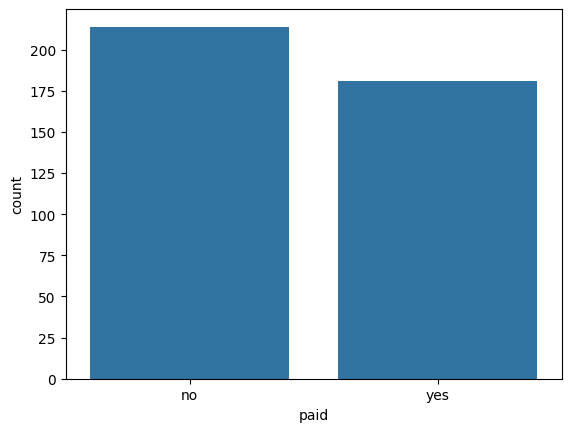

            activities  Ratio
activities                   
yes                201 50.886
no                 194 49.114
##########################


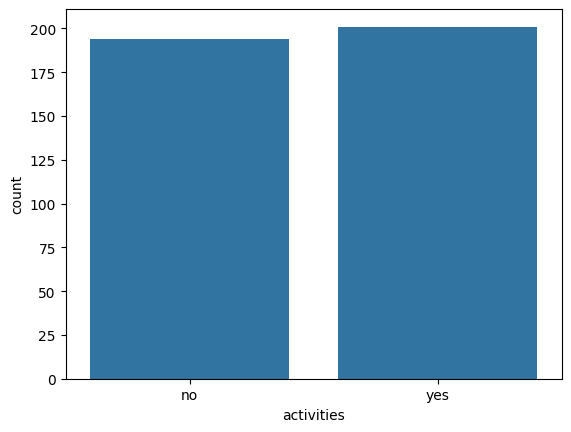

         nursery  Ratio
nursery                
yes          314 79.494
no            81 20.506
##########################


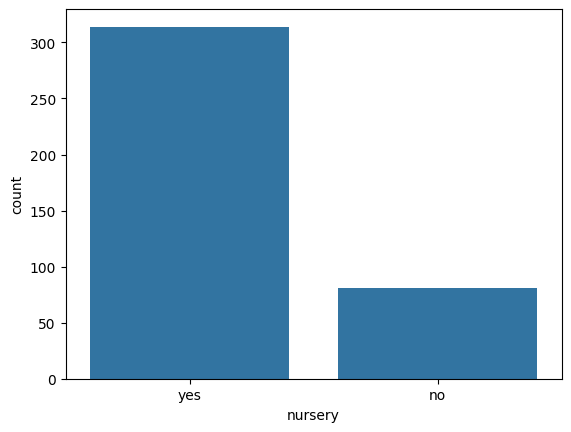

        higher  Ratio
higher               
yes        375 94.937
no          20  5.063
##########################


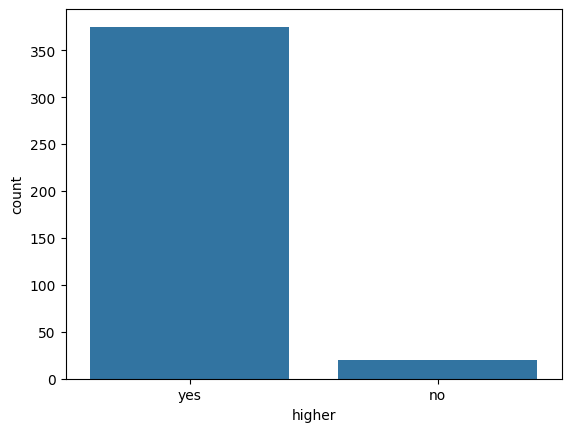

          internet  Ratio
internet                 
yes            329 83.291
no              66 16.709
##########################


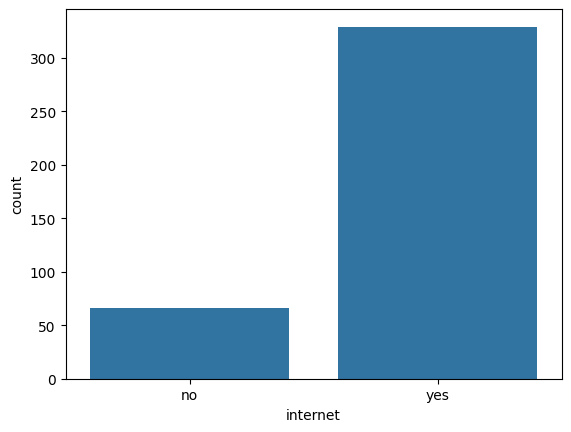

          romantic  Ratio
romantic                 
no             263 66.582
yes            132 33.418
##########################


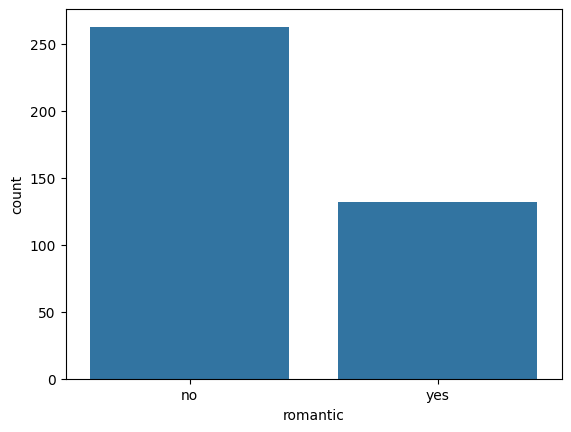

      Medu  Ratio
Medu             
4      131 33.165
2      103 26.076
3       99 25.063
1       59 14.937
0        3  0.759
##########################


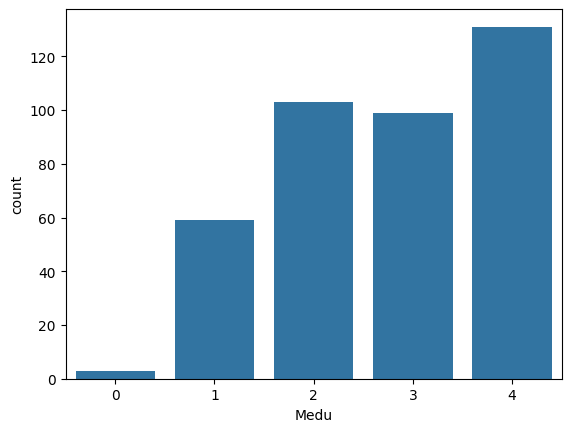

      Fedu  Ratio
Fedu             
2      115 29.114
3      100 25.316
4       96 24.304
1       82 20.759
0        2  0.506
##########################


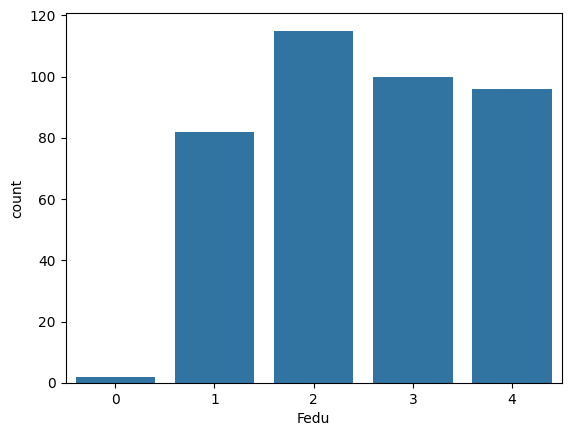

            traveltime  Ratio
traveltime                   
1                  257 65.063
2                  107 27.089
3                   23  5.823
4                    8  2.025
##########################


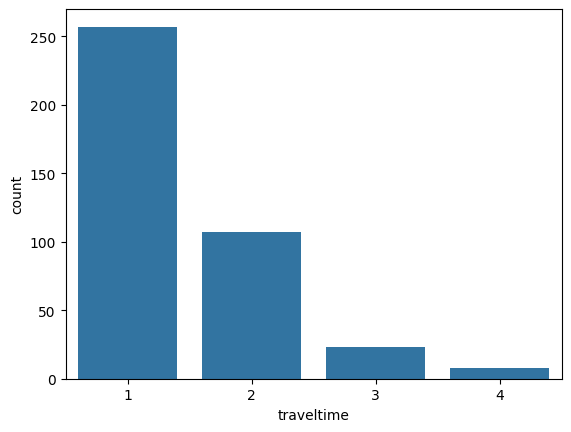

           studytime  Ratio
studytime                  
2                198 50.127
1                105 26.582
3                 65 16.456
4                 27  6.835
##########################


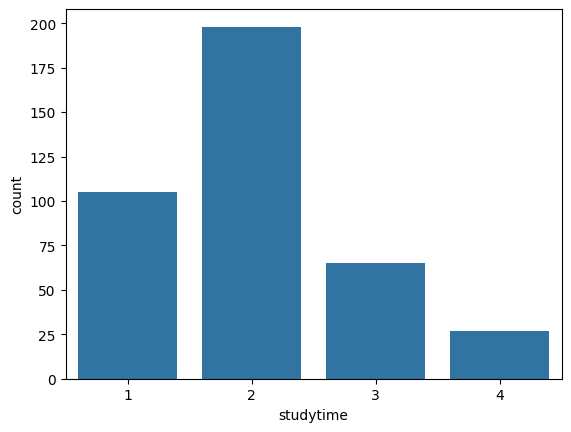

          failures  Ratio
failures                 
0              312 78.987
1               50 12.658
2               17  4.304
3               16  4.051
##########################


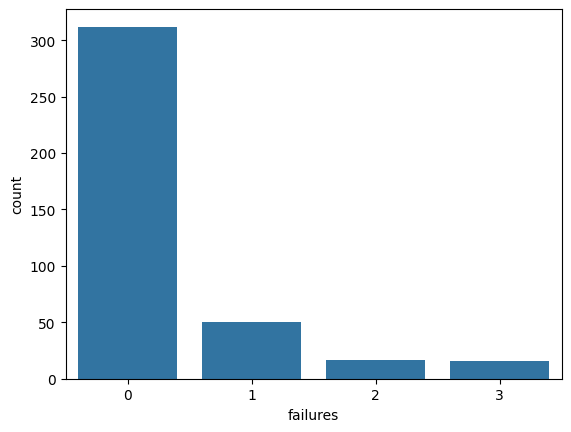

        famrel  Ratio
famrel               
4          195 49.367
5          106 26.835
3           68 17.215
2           18  4.557
1            8  2.025
##########################


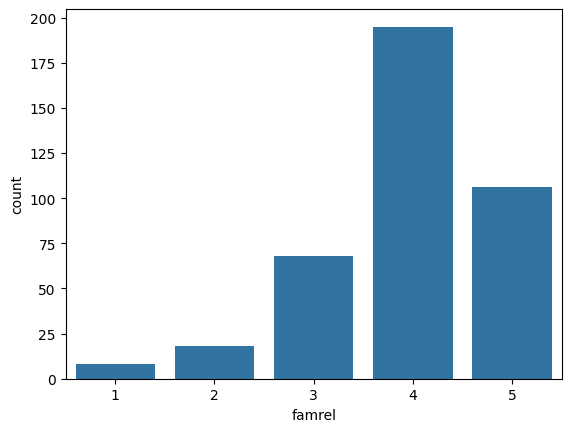

          freetime  Ratio
freetime                 
3              157 39.747
4              115 29.114
2               64 16.203
5               40 10.127
1               19  4.810
##########################


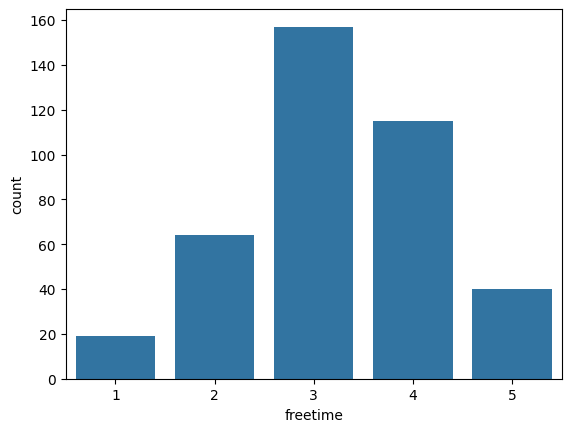

       goout  Ratio
goout              
3        130 32.911
2        103 26.076
4         86 21.772
5         53 13.418
1         23  5.823
##########################


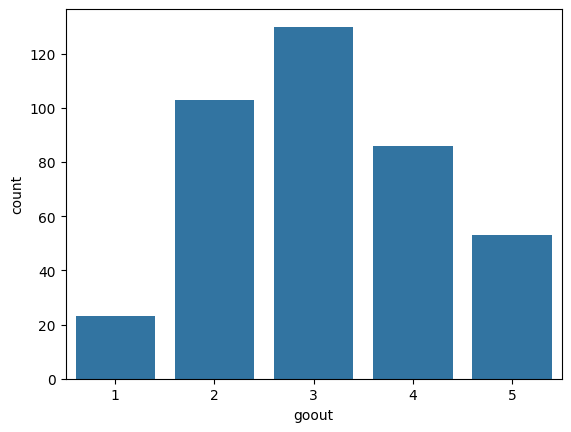

      Dalc  Ratio
Dalc             
1      276 69.873
2       75 18.987
3       26  6.582
5        9  2.278
4        9  2.278
##########################


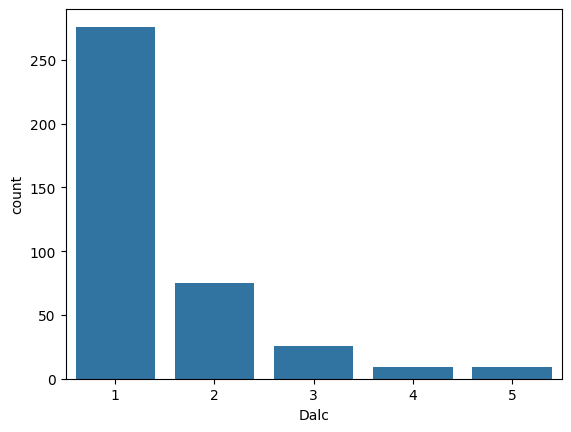

      Walc  Ratio
Walc             
1      151 38.228
2       85 21.519
3       80 20.253
4       51 12.911
5       28  7.089
##########################


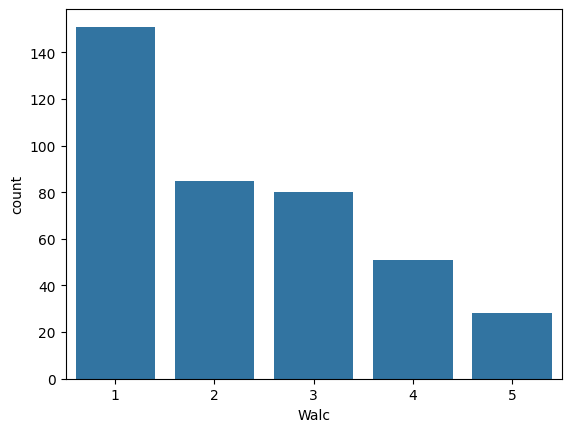

        health  Ratio
health               
5          146 36.962
3           91 23.038
4           66 16.709
1           47 11.899
2           45 11.392
##########################


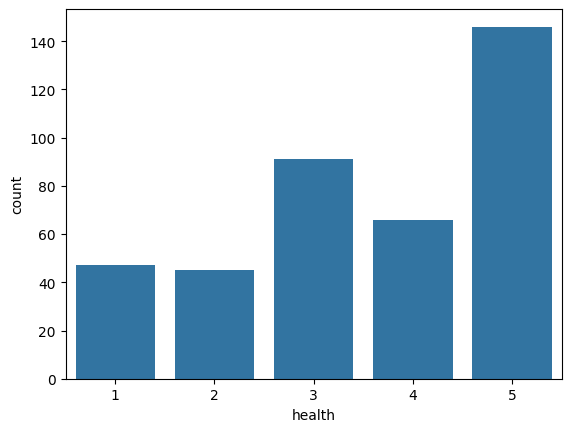

In [26]:
for col in cat_cols:
    cat_summary(df,col,plot=True)

In [27]:
def num_summary(dataframe,col_name, plot = False):
    print(dataframe[col_name].describe().T)

    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show()

count   395.000
mean     16.696
std       1.276
min      15.000
25%      16.000
50%      17.000
75%      18.000
max      22.000
Name: age, dtype: float64


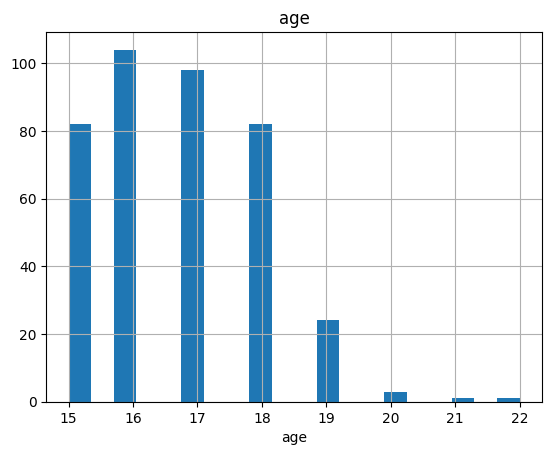

count   395.000
mean      5.709
std       8.003
min       0.000
25%       0.000
50%       4.000
75%       8.000
max      75.000
Name: absences, dtype: float64


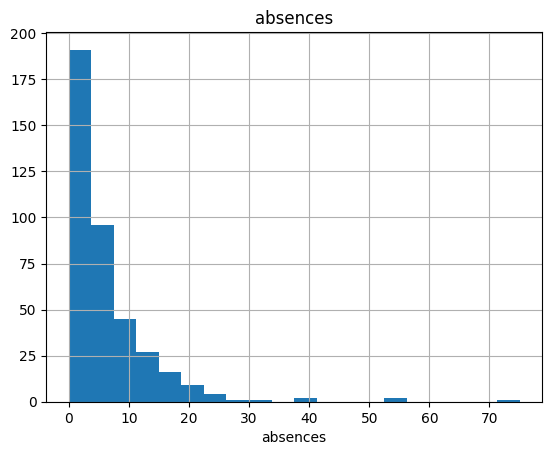

count   395.000
mean     10.909
std       3.319
min       3.000
25%       8.000
50%      11.000
75%      13.000
max      19.000
Name: G1, dtype: float64


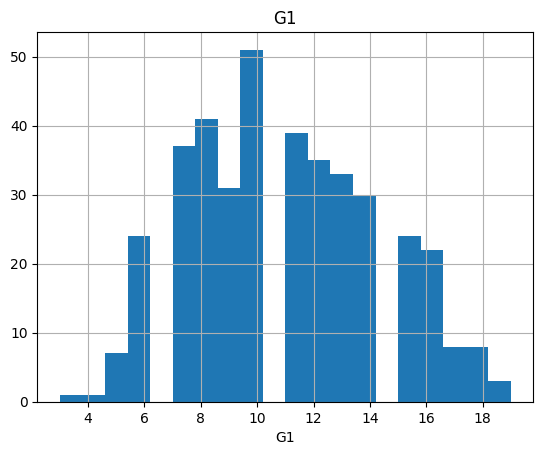

count   395.000
mean     10.714
std       3.762
min       0.000
25%       9.000
50%      11.000
75%      13.000
max      19.000
Name: G2, dtype: float64


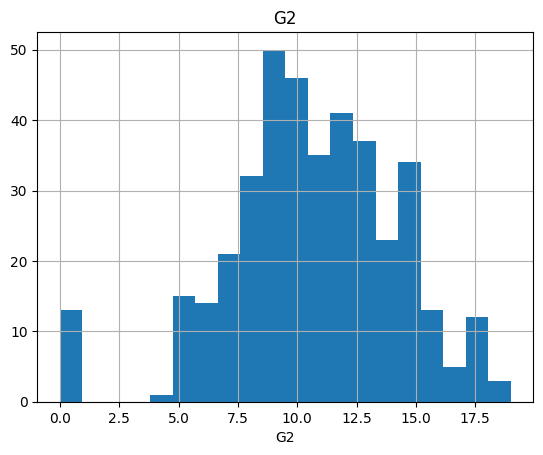

count   395.000
mean     10.415
std       4.581
min       0.000
25%       8.000
50%      11.000
75%      14.000
max      20.000
Name: G3, dtype: float64


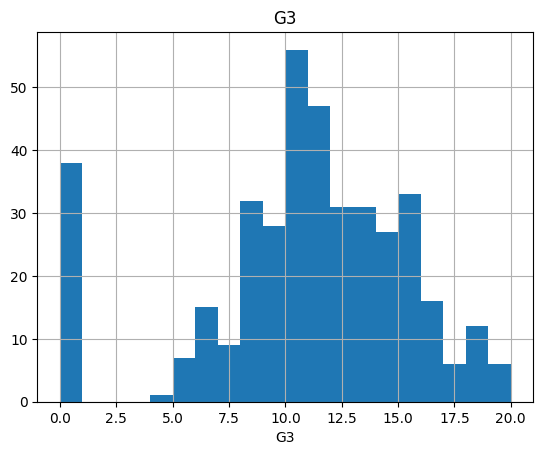

count   395.000
mean     32.038
std      11.090
min       4.000
25%      25.000
50%      32.000
75%      40.000
max      58.000
Name: Total_Score, dtype: float64


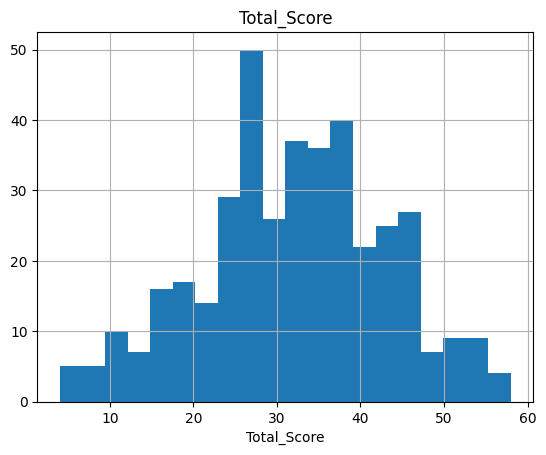

count   395.000
mean     10.679
std       3.697
min       1.333
25%       8.333
50%      10.667
75%      13.333
max      19.333
Name: Average_Score, dtype: float64


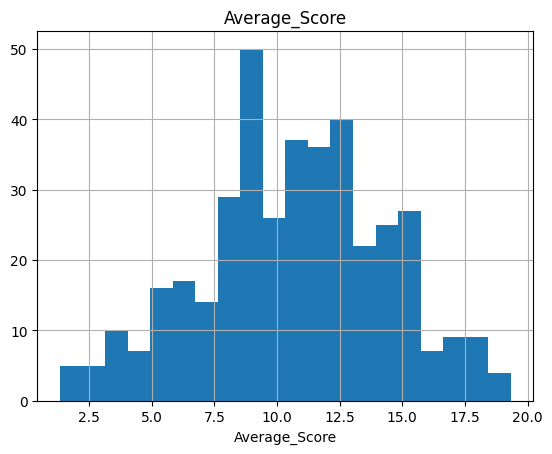

In [28]:
for col in num_cols:
    num_summary(df,col, plot=True)

In [29]:
num_cols = [col for col in num_cols if col!="Average_Score"]
print(num_cols)

['age', 'absences', 'G1', 'G2', 'G3', 'Total_Score']


In [30]:
def target_summary_with_num_corr(dataframe, target, numerical_col):
    corr = dataframe[[numerical_col, target]].corr().loc[numerical_col, target]
    print(f"Korelasyon ({numerical_col} ve {target} arasında): {corr:.4f}")


In [31]:
for col in num_cols:
    target_summary_with_num_corr(df, "Average_Score", col)

Korelasyon (age ve Average_Score arasında): -0.1346
Korelasyon (absences ve Average_Score arasında): -0.0059
Korelasyon (G1 ve Average_Score arasında): 0.9194
Korelasyon (G2 ve Average_Score arasında): 0.9680
Korelasyon (G3 ve Average_Score arasında): 0.9599
Korelasyon (Total_Score ve Average_Score arasında): 1.0000


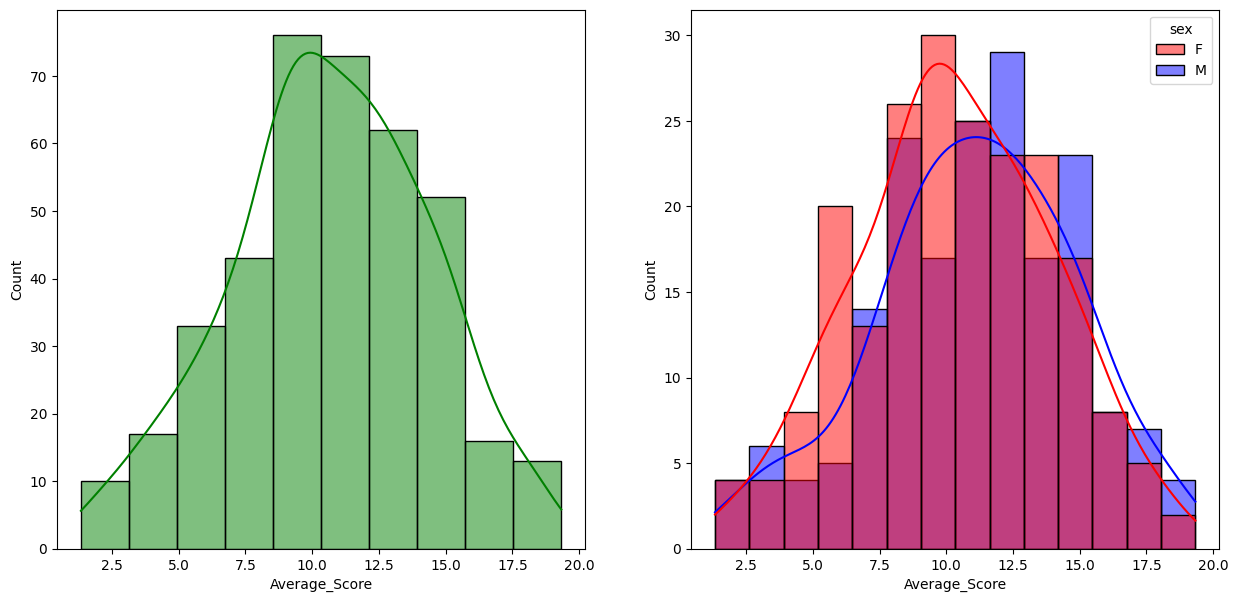

In [32]:
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x ="Average_Score", bins=10,kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="Average_Score", kde=True, hue="sex", palette={"F": "red", "M": "blue"})
plt.show()

In [33]:
from scipy.stats import ttest_ind

In [34]:

female_scores = df[df["sex"] == "F"]["Average_Score"]
male_scores = df[df["sex"] == "M"]["Average_Score"]
t_stat, p_value = ttest_ind(female_scores, male_scores, equal_var=False)

print(f"T istatistiği: {t_stat:.4f}")
print(f"P değeri: {p_value:.4f}")

# Yorumu otomatikleştir
if p_value < 0.05:
    print("👉 Sonuç: Kadın ve erkek öğrencilerin not ortalamaları arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("👉 Sonuç: Kadın ve erkek öğrencilerin not ortalamaları arasında istatistiksel olarak anlamlı bir fark yoktur.")


T istatistiği: -2.0108
P değeri: 0.0450
👉 Sonuç: Kadın ve erkek öğrencilerin not ortalamaları arasında istatistiksel olarak anlamlı bir fark vardır.


In [35]:
female_scores.mean()

10.325320512820513

In [36]:
male_scores.mean()

11.073083778966131

## Missing Value

In [213]:
df.isnull().sum()

school           0
sex              0
age              0
address          0
famsize          0
Pstatus          0
Medu             0
Fedu             0
Mjob             0
Fjob             0
reason           0
guardian         0
traveltime       0
studytime        0
failures         0
schoolsup        0
famsup           0
paid             0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
Dalc             0
Walc             0
health           0
absences         0
G1               0
G2               0
G3               0
Total_Score      0
Average_Score    0
dtype: int64

In [180]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.000,16.696,1.276,15.000,16.000,17.000,18.000,22.000
absences,395.000,5.709,8.003,0.000,0.000,4.000,8.000,75.000
G1,395.000,10.909,3.319,3.000,8.000,11.000,13.000,19.000
G2,395.000,10.714,3.762,0.000,9.000,11.000,13.000,19.000
G3,395.000,10.415,4.581,0.000,8.000,11.000,14.000,20.000
Total_Score,395.000,32.038,11.090,4.000,25.000,32.000,40.000,58.000


# Base Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



In [43]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [44]:
binary_col = [col for col in df.columns if df[col].nunique()==2 and df[col].dtypes == "O"]
binary_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [45]:
for col in binary_col:
    df = label_encoder(df,col)

In [47]:
def one_hot_encoder(dataframe, categoricel_col, drop_first=False):
    dataframe = pd.get_dummies(dataframe,columns=categoricel_col, drop_first=drop_first)
    return dataframe

In [48]:
df= one_hot_encoder(df,cat_cols,drop_first=True)

In [52]:
X = df.drop(["Average_Score", "Total_Score", "G1", "G2", "G3"], axis=1)
y = df["Average_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Base Model RMSE: {rmse:.4f}")

Base Model RMSE: 3.6577


Outliers

In [65]:
df = load_dataframe()

In [66]:
df["Total_Score"] = (df["G1"] + df["G2"] + df["G3"])
df["Average_Score"] = df["Total_Score"] / 3

In [67]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations : 395
Variables : 35
cat_cols : 28
num_cols : 7
cat_but_car : 0
num_but_cat : 11


In [68]:
num_cols

['age', 'absences', 'G1', 'G2', 'G3', 'Total_Score', 'Average_Score']

In [69]:
def outlier_threshold(dataframe, column, q1=0.05, q3=0.95):
    quartile1 = dataframe[column].quantile(q1)
    quartile3 = dataframe[column].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + interquartile_range*1.5
    low_limit = quartile1 - interquartile_range*1.5
    return low_limit, up_limit

In [70]:
def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_threshold(dataframe, col_name)
    if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name]<low_limit)].any(axis=None):
        return True
    else:
        return False

In [71]:
def replace_with_threshold(dataframe, column):
    low_limit, up_limit = outlier_threshold(dataframe, column)
    dataframe.loc[(dataframe[column]<low_limit), column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit), column]=up_limit

In [72]:
for col in num_cols:
    print(col, check_outliers(df,col))
    if check_outliers(df,col):
        replace_with_threshold(df,col)

age False
absences True
G1 False
G2 False
G3 False
Total_Score False
Average_Score False


In [73]:
for col in num_cols:
    print(col, check_outliers(df,col))

age False
absences False
G1 False
G2 False
G3 False
Total_Score False
Average_Score False


In [74]:
df["has_failures"] = df["failures"].apply(lambda x: 1 if x > 0 else 0)
df["high_studytime"] = df["studytime"].apply(lambda x: 1 if x >= 3 else 0)
df["avg_parent_edu"] = (df["Medu"] + df["Fedu"]) / 2
df["early_failure"] = df["G1"].apply(lambda x: 1 if x < 5 else 0)

df["parents_together"] = df["Pstatus"].apply(lambda x: 1 if x == "T" else 0)
df["big_family"] = df["famsize"].apply(lambda x: 1 if x == "GT3" else 0)

df["urban_student"] = df["address"].apply(lambda x: 1 if x == "U" else 0)
df["long_travel"] = df["traveltime"].apply(lambda x: 1 if x >= 3 else 0)

df["has_internet"] = df["internet"].apply(lambda x: 1 if x == "yes" else 0)
df["romantic_rel"] = df["romantic"].apply(lambda x: 1 if x == "yes" else 0)

df["high_alcohol_use"] = (df["Dalc"] + df["Walc"]).apply(lambda x: 1 if x >= 6 else 0)
df["high_absenteeism"] = df["absences"].apply(lambda x: 1 if x >= 10 else 0)


In [77]:
df.to_csv(r"D:\end_to_end_mlproject\notebook/data/cleaned_student_data.csv", index=False)
